# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://hdjq.fa.us2.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX_1/job/25017214">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://web.archive.org/web/20230115132446/https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to the following:
    - tomer.zemelman@emerson.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [1]:
import pandas as pd
import numpy as np
import zipfile
from datetime import datetime
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models

### Load Data

In [2]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [3]:
#load train data
df_wafers = pd.read_csv(zf.open('wafers_train.csv'))
df_wafers.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,8PFrAN,0,27,True,False
1,8PFrAN,0,28,True,False
2,8PFrAN,0,29,True,False
3,8PFrAN,0,30,True,False
4,8PFrAN,0,31,True,False


In [4]:
#load test data
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))
df_wafers_test.head()

,WaferName,DieX,DieY,IsGoodDie
0,mZa9ls,0,23,True
1,mZa9ls,0,24,True
2,mZa9ls,0,25,True
3,mZa9ls,0,26,True
4,mZa9ls,0,27,True


You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [5]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

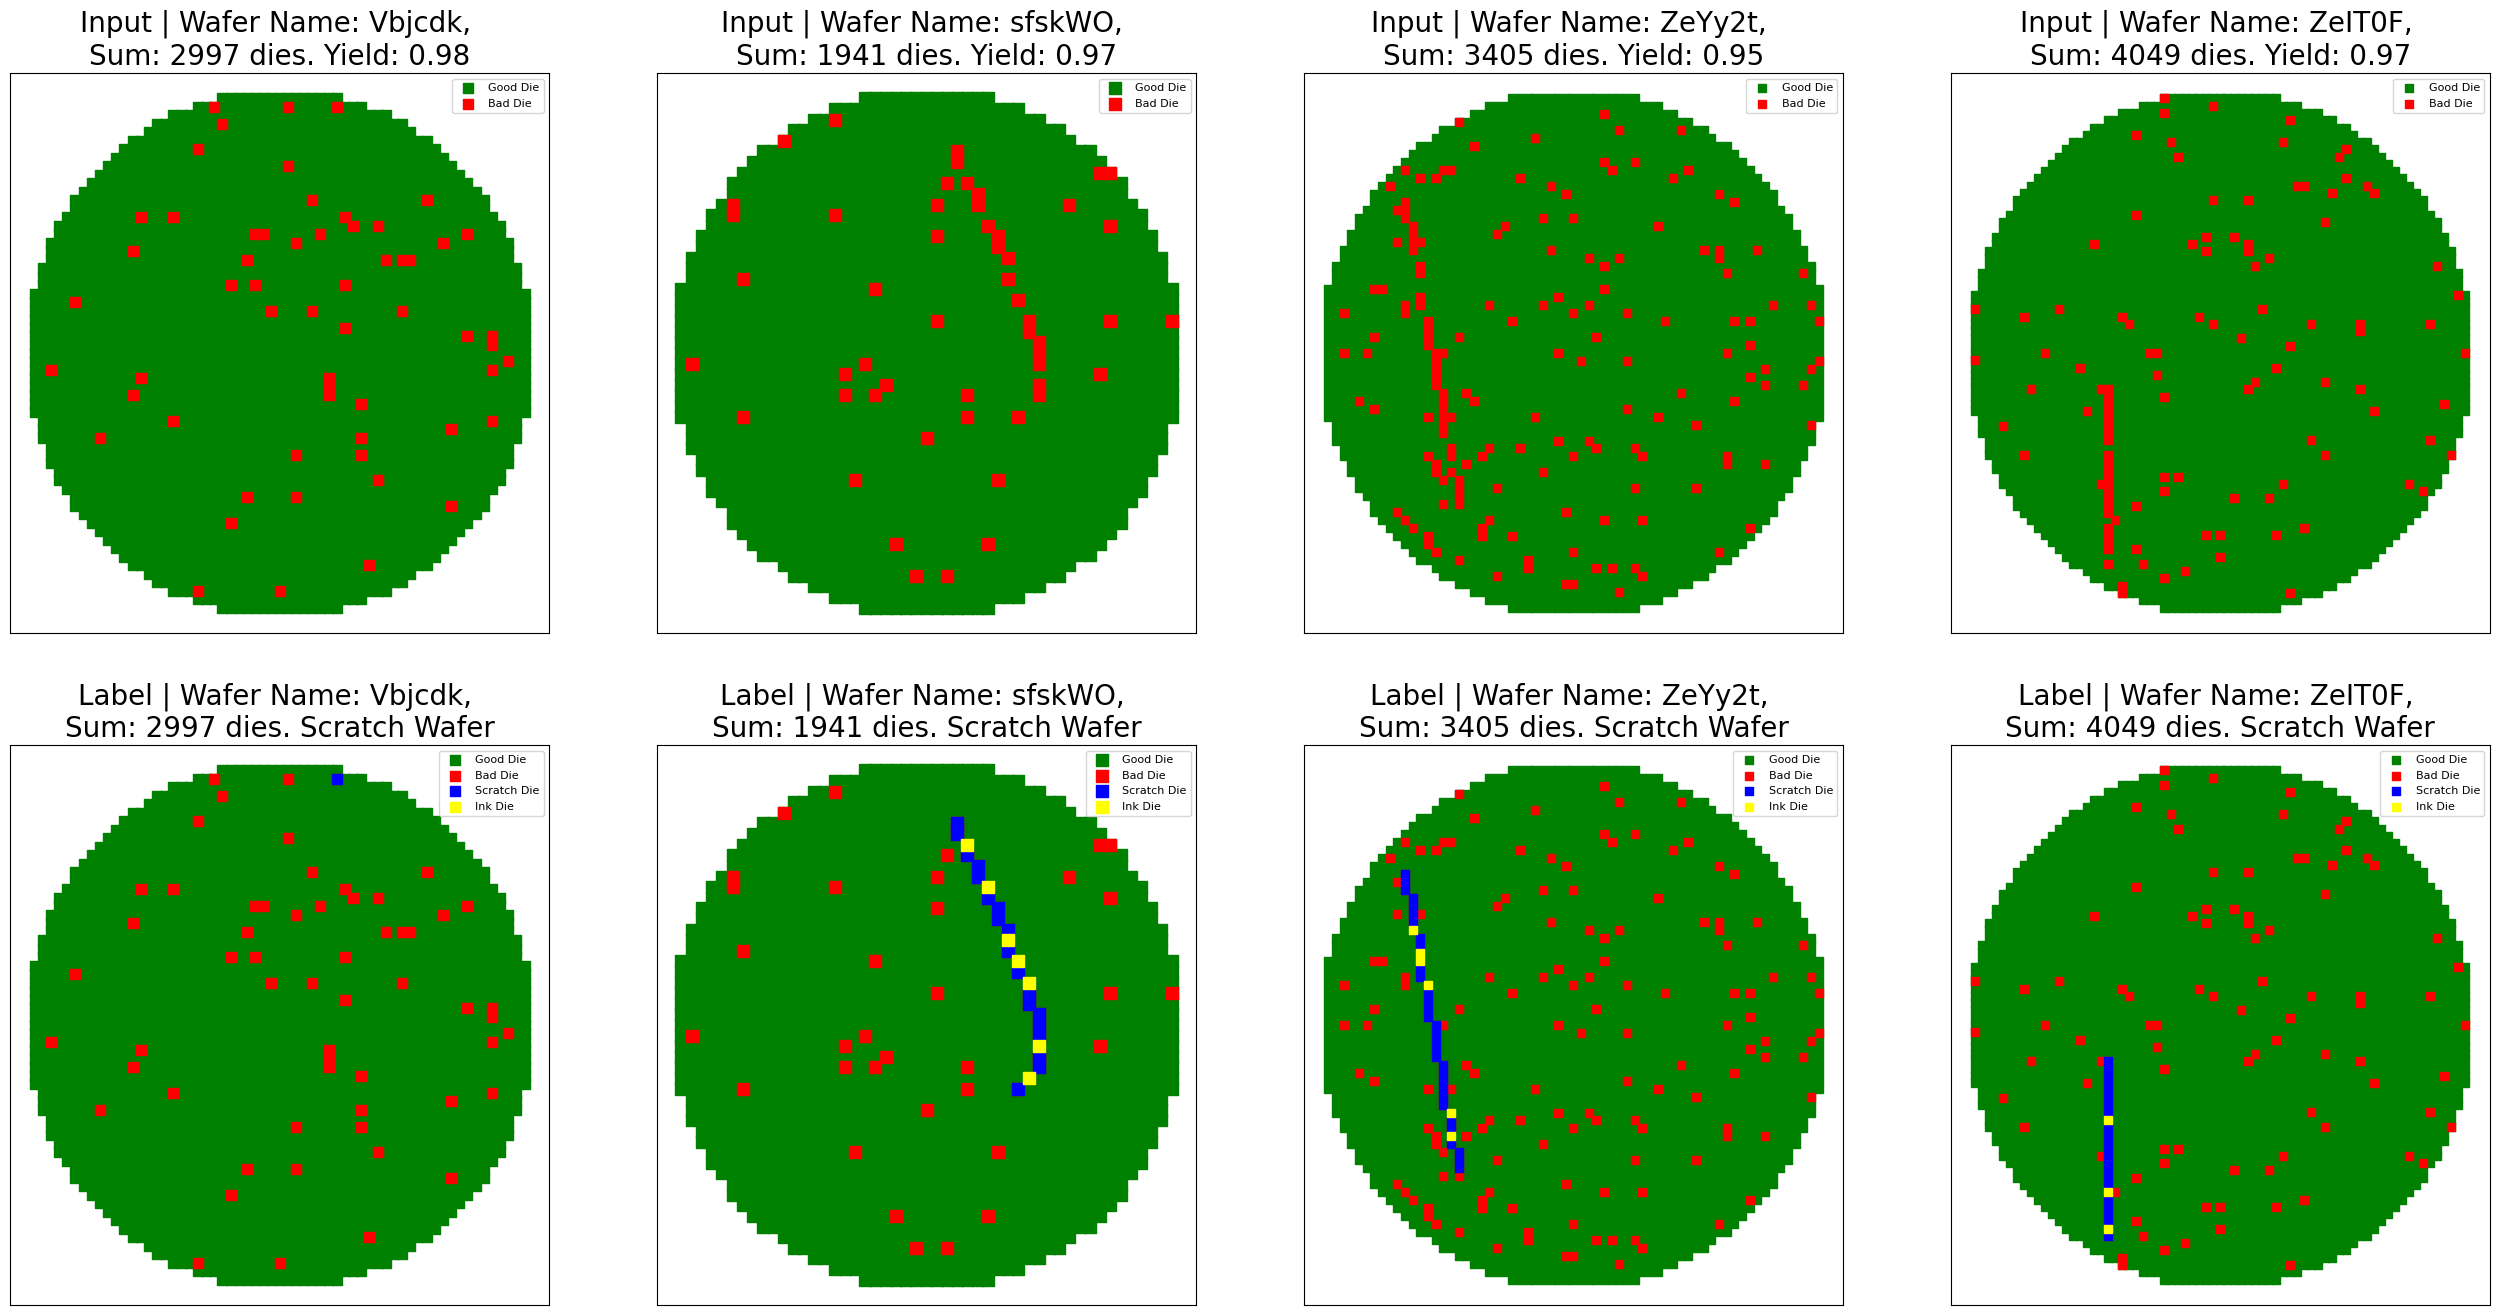

In [6]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

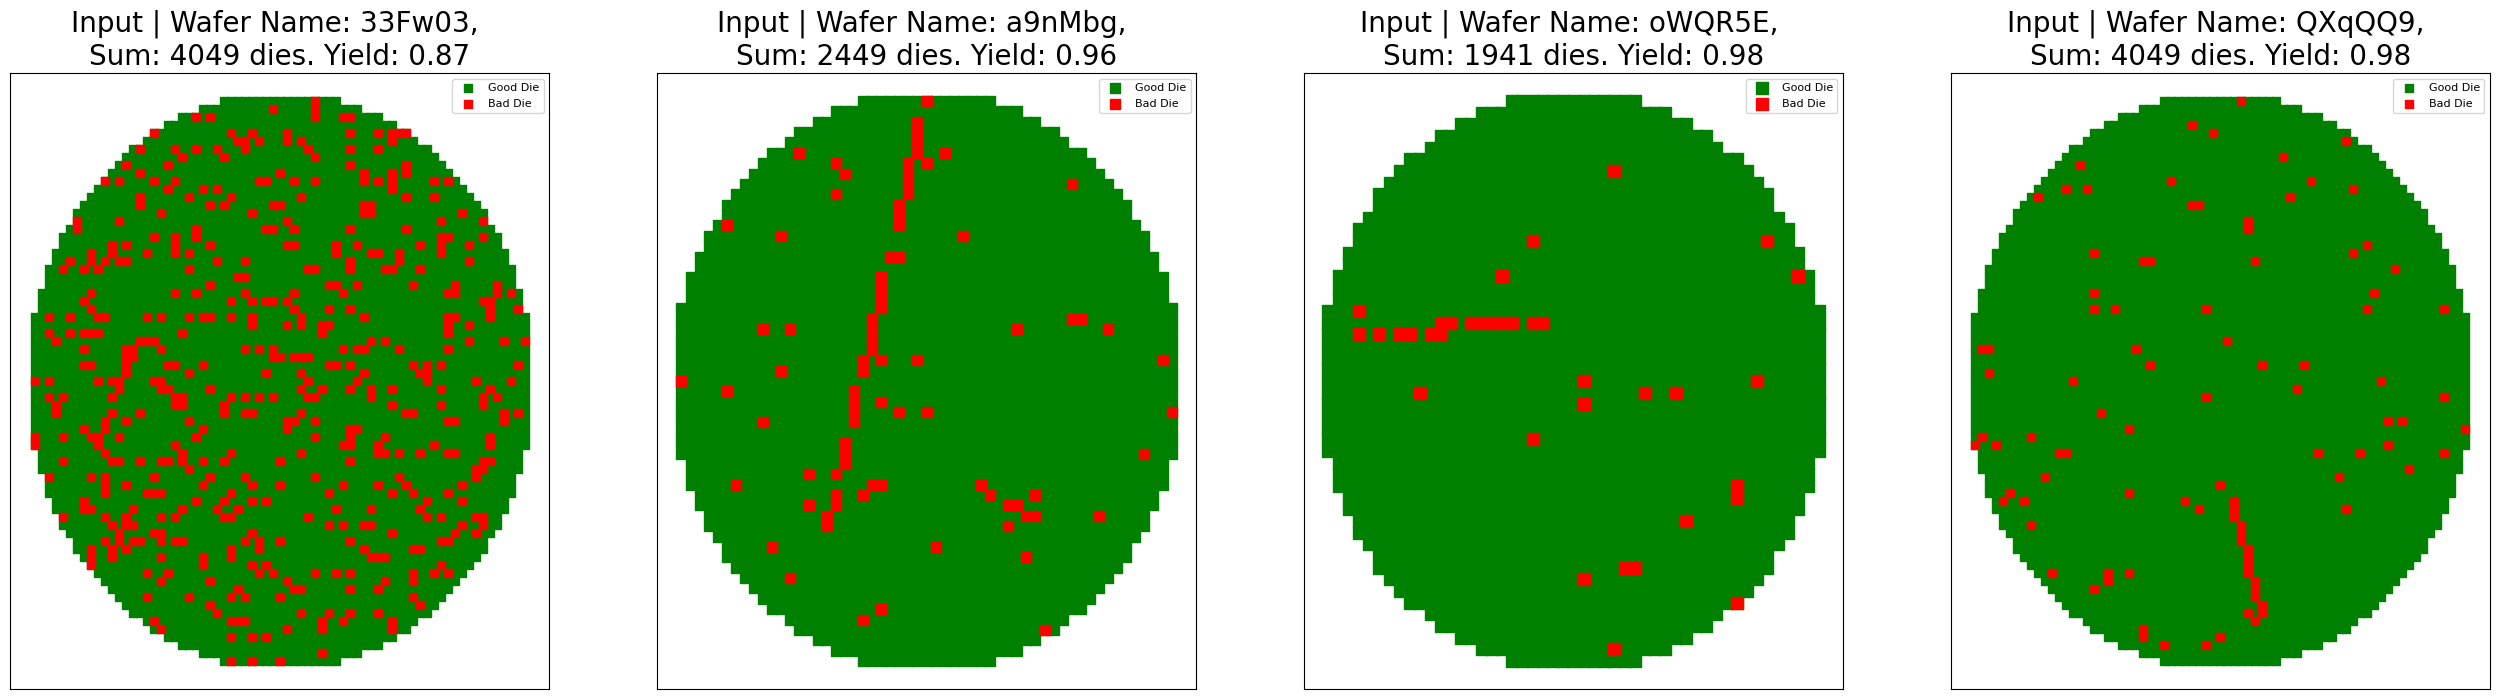

In [7]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

In [8]:
#TODO build your solution
## Helper functions

"""
Helper Functions:
- wafer_to_array: Converts a wafer dataframe into a 2D grid (image) where each die is 1 (good) or 0 (bad).
- wafer_to_scratch_array: Converts a wafer dataframe into a scratch label mask, marking scratched dies.
- build_unet_model: Builds a simple U-Net CNN model for pixel-wise scratch segmentation.

Variables:
- wafer_df: A dataframe containing die information (DieX, DieY, IsGoodDie, IsScratchDie, etc.).
- grid_size: Size of the wafer grid. Here it is fixed to 72x72.
- input_shape: Shape of the input image to the CNN model (72, 72, 1).
"""
def wafer_to_array(wafer_df, label_col='IsGoodDie', grid_size=72):
    img = np.zeros((grid_size, grid_size), dtype=np.float32)
    for _, row in wafer_df.iterrows():
        x = int(row['DieX'])
        y = int(row['DieY'])
        if 0 <= x < grid_size and 0 <= y < grid_size:
            img[y, x] = 1.0 if row[label_col] else 0.0
    return img


def wafer_to_scratch_array(wafer_df, label_col='IsScratchDie', grid_size=72):
    img = np.zeros((grid_size, grid_size), dtype=np.float32)
    for _, row in wafer_df.iterrows():
        x = int(row['DieX'])
        y = int(row['DieY'])
        if 0 <= x < grid_size and 0 <= y < grid_size:
            img[y, x] = 1.0 if row[label_col] else 0.0
    return img


def build_unet_model(input_shape=(72, 72, 1)):
    """
    Builds a simple U-Net CNN model for segmenting scratches on wafer maps.
    
    - Encoder: Downsamples the image while extracting features.
    - Bottleneck: Deepest layer with dropout for regularization.
    - Decoder: Upsamples and reconstructs the image with feature concatenation.

    Returns:
    - Compiled Keras Model.
    """
    inputs = keras.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)  # 72 -> 36

    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)  # 36 -> 18

    # Bottleneck
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Dropout(0.3)(c3)
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c3)

    # Decoder
    u4 = layers.UpSampling2D((2, 2))(c3)  # 18 -> 36
    u4 = layers.Concatenate()([u4, c2])
    c4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u4)
    c4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c4)

    u5 = layers.UpSampling2D((2, 2))(c4)  # 36 -> 72
    u5 = layers.Concatenate()([u5, c1])
    c5 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(c5)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model




# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

In [9]:
#TODO add your thoughts
"""
During the project, I worked in a way that matched the business needs while keeping the solution simple and effective.

first i did Data Exploration:
* I carefully explored the wafer map structure, identifying that DieX, DieY map a grid of size 71x71 (later adapted to 72x72)
* I analyzed the distribution of good/bad dies and found scratches are relatively rare, suggesting a high imbalance in the data, which I kept in mind while designing the model.

Model Choice:
Other Models I Tried First and Why I Switched:
At first, I tested models like LightGBM and Random Forests based on die-level features (DieX, DieY, neighbor counts).
However, these models couldn’t capture the wafer’s spatial structure and struggled with detecting subtle scratches.
Since I was already familiar with CNN models from projects during my Computer Science degree at Ariel University, and after further research online, I decided to switch to a CNN-based U-Net architecture.
The U-Net allowed me to better model the wafer as an image and significantly improved scratch detection and localization, better aligning with the business goals.
* I decided to use a CNN with U-Net structure, because it is very good for tasks where you need to mark exact areas (pixel by pixel).
* I added dropout layers to make the model more stable and avoid overfitting (so the model will work well also on new data).

Training and Results:
* I normalized the data and trained the model properly.
* I followed the training and validation accuracy and loss. The results were very good: over 99.9% accuracy and low loss, without signs of overfitting.

Future Ideas:
* I can add data augmentation (like rotation or noise) to make the model even stronger.
*  I can add simple heatmaps so the user can see where the model found scratches.

Some extra words, I didn’t just build a model — I thought about the whole process: understanding the data, choosing the right model, and making sure it matches the business needs.
I would love to bring this practical and clear thinking to your company as well.

"""



'\nDuring the project, I worked in a way that matched the business needs while keeping the solution simple and effective.\n\nfirst i did Data Exploration:\n* I carefully explored the wafer map structure, identifying that DieX, DieY map a grid of size 71x71 (later adapted to 72x72)\n* I analyzed the distribution of good/bad dies and found scratches are relatively rare, suggesting a high imbalance in the data, which I kept in mind while designing the model.\n\nModel Choice:\nOther Models I Tried First and Why I Switched:\nAt first, I tested models like LightGBM and Random Forests based on die-level features (DieX, DieY, neighbor counts).\nHowever, these models couldn’t capture the wafer’s spatial structure and struggled with detecting subtle scratches.\nSince I was already familiar with CNN models from projects during my Computer Science degree at Ariel University, and after further research online, I decided to switch to a CNN-based U-Net architecture.\nThe U-Net allowed me to better mo

# Submission

Epoch 1/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - accuracy: 0.9660 - loss: 0.1243 - val_accuracy: 0.9965 - val_loss: 0.0092
Epoch 2/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 25s 121ms/step - accuracy: 0.9963 - loss: 0.0091 - val_accuracy: 0.9983 - val_loss: 0.0058
Epoch 3/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 25s 118ms/step - accuracy: 0.9984 - loss: 0.0056 - val_accuracy: 0.9987 - val_loss: 0.0045
Epoch 4/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 24s 115ms/step - accuracy: 0.9987 - loss: 0.0042 - val_accuracy: 0.9989 - val_loss: 0.0035
Epoch 5/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.9989 - loss: 0.0034 - val_accuracy: 0.9990 - val_loss: 0.0032
Epoch 6/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9991 - val_loss: 0.0026
Epoch 7/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 24s 115ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9992 - val_loss: 0.0024
Epoch 8/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.9992 - loss: 0

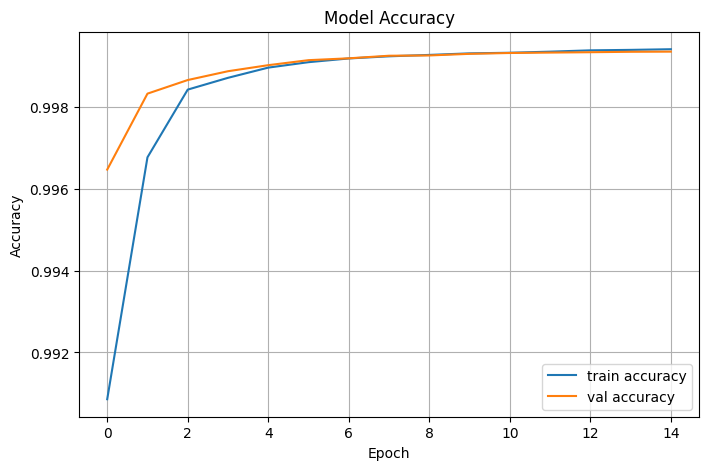

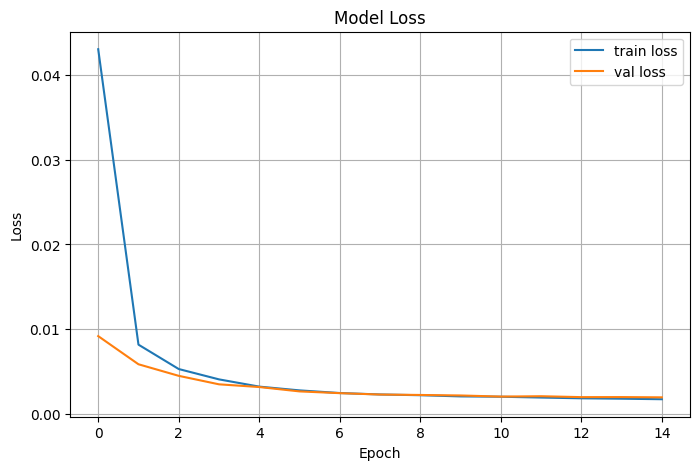

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


In [ ]:
"""
- Loads and processes training wafer data into images and masks.
- Builds a U-Net CNN model for pixel-wise scratch detection.
- Trains the model.
- Visualizes training curves (accuracy and loss).
- Applies the model to predict scratches on the test data.
- Maps the predictions back to dies at the wafer level.

Variables:
- X_images: Input images for training (based on IsGoodDie).
- Y_masks: Target masks for training (based on IsScratchDie).
- X_test_images: Input images for testing.
- pred_masks: Predicted scratch maps for test wafers.
"""
## Load and Prepare Training Data
X_images = []
Y_masks = []

for wafer_name, wafer_df in df_wafers.groupby('WaferName'):
    img = wafer_to_array(wafer_df, label_col='IsGoodDie')
    mask = wafer_to_scratch_array(wafer_df, label_col='IsScratchDie')
    X_images.append(img)
    Y_masks.append(mask)

X_images = np.array(X_images)[..., np.newaxis]  
Y_masks = np.array(Y_masks)[..., np.newaxis]  

## Normalize
X_images = X_images / 1.0
Y_masks = Y_masks / 1.0

## Build and Train U-Net Model
model = build_unet_model()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_images, Y_masks,
    epochs=15,
    batch_size=16,
    validation_split=0.2
)


## Accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Loss plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Prepare Test Wafer Data
X_test_images = []
wafer_test_names = df_wafers_test['WaferName'].unique()

for wafer_name in wafer_test_names:
    wafer_df = df_wafers_test[df_wafers_test['WaferName'] == wafer_name]
    img = wafer_to_array(wafer_df, label_col='IsGoodDie')
    X_test_images.append(img)

X_test_images = np.array(X_test_images)[..., np.newaxis]  
X_test_images = X_test_images / 1.0

## Predict Scratch Masks for Test
pred_masks = model.predict(X_test_images)
pred_masks = (pred_masks > 0.5).astype(int).squeeze()  

## Map Predictions Back to Dies
df_wafers_test['IsScratchDie'] = 0

for idx, wafer_name in enumerate(wafer_test_names):
    wafer_mask = pred_masks[idx]
    wafer_df_idx = df_wafers_test['WaferName'] == wafer_name
    for i, row in df_wafers_test[wafer_df_idx].iterrows():
        x, y = int(row['DieX']), int(row['DieY'])
        if 0 <= x < 72 and 0 <= y < 72:
            df_wafers_test.at[i, 'IsScratchDie'] = int(wafer_mask[y, x])


#TODO Fill in your name and email
name = 'Beni Tibi'
email = 'benit1234@gmail.com'

#Dont change the following code
date_str = datetime.now().strftime('%Y%m%d')
filename = f"{date_str}_{name}_{email}_df_wafers_test_with_preds.csv"
df_wafers_test.to_csv(filename, index=False)
print("Saved file:", filename)